In [154]:
from boxoffice.db.frames import get_box_office_day_frame, get_movie_frame
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# get the box office day frame
bodf = get_box_office_day_frame()
mdf = get_movie_frame()




ImportError: cannot import name 'get_distributor_frame' from 'boxoffice.db.frames' (C:\Users\amy\Documents\STAT413\stat413-boxoffice\boxoffice\db\frames.py)

In [106]:
# Scatterplot of 
max_theaters = pd.DataFrame(bodf.groupby("movie")["theaters"].max())
total_rev = pd.DataFrame(bodf.groupby("movie")["revenue"].sum())

threshold_10 = total_rev["revenue"].quantile(0.7)
total_rev = total_rev[total_rev["revenue"] >= threshold_10]

theater_rev = total_rev.join(max_theaters)
theater_rev = theater_rev.merge(mdf[["id", "source", 'genre']], how = "inner", left_index = True, right_on = "id")

other_sources = [
    'Based on Real Life Events',
    'Based on Factual Book/Article',
    'Based on Toy',
    'Based on Game',
    'Based on TV',
    'Based on Folk Tale/Legend/Fairytale',
    'Based on Theme Park Ride',
    'Based on Religious Text',
    'Based on Movie',
    'Spin-Off',
    'Remake',
    # 'Based on Fiction Book/Short Story'
]

other_genres = [
    'Thriller/Suspense',
    'Concert/Performance',
    'Drama',
    'Comedy',
    'Horror',
    'Romantic Comedy',
    'Western'
]

theater_rev['other_source'] = theater_rev['source'].apply(lambda x: 'Other' if x in other_sources else x)
theater_rev['genre'] = theater_rev['genre'].apply(lambda x: 'Other' if x in other_genres else x)

<Axes: xlabel='theaters', ylabel='revenue'>

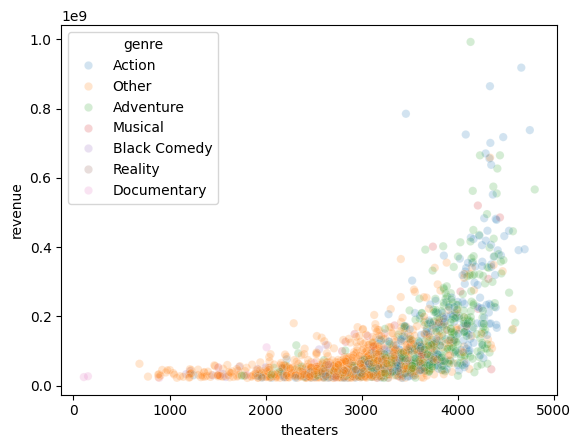

In [107]:
sns.scatterplot(data = theater_rev, x = "theaters", y = "revenue", 
                hue = "genre", alpha = 0.2)

<Axes: xlabel='theaters', ylabel='revenue'>

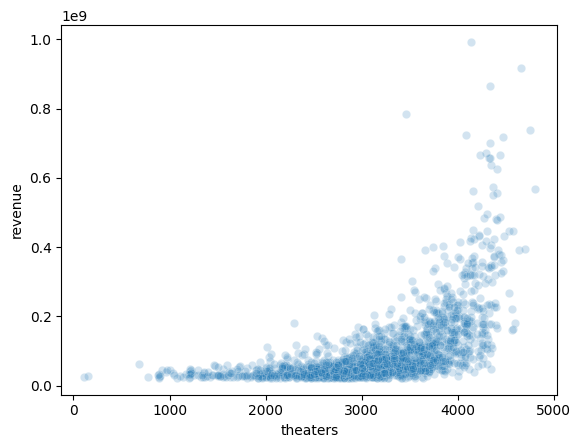

In [108]:
sns.scatterplot(data = theater_rev, x = "theaters", y = "revenue", 
                # hue = "other_source", 
                alpha = 0.2)

Text(0.5, 1.03, 'for Each Movie Above 70th percentile of grossings')

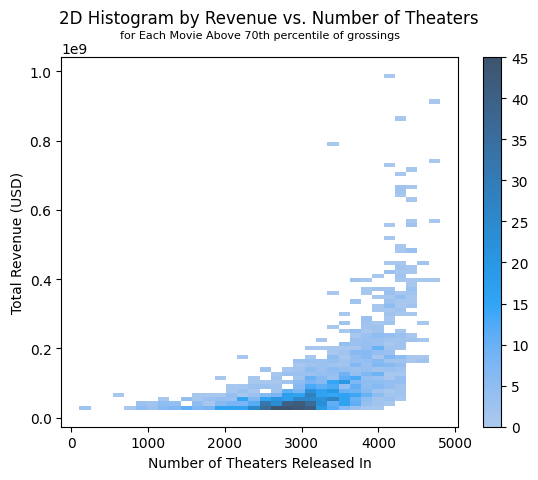

In [153]:
# 2d Histogram of total movie revenue vs. number of theaters for 70th percentile of grossings
ax = sns.histplot(data = theater_rev, x = "theaters", y = "revenue", cbar = True)
ax.set_xlabel("Number of Theaters Released In")
ax.set_ylabel("Total Revenue (USD)")

plt.suptitle("2D Histogram by Revenue vs. Number of Theaters", x = .45, fontsize = 12)
plt.title("for Each Movie Above 70th percentile of grossings", y = 1.03, fontsize = 8)

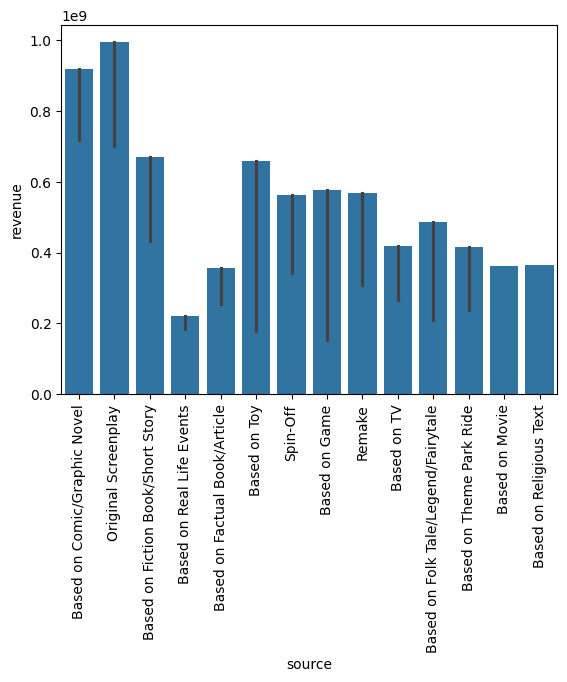

In [87]:
sns.barplot(data = theater_rev, x = "source", y = "revenue", estimator = "max")
plt.xticks(rotation = 90)
plt.show()